### Model Training

1.1 Import Data and Required Packages

Importing Pandas, NumPy, Matplotlib, Seaborn and Warnings Library

In [21]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


Import the CSV Data as Pandas DataFrame

In [22]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [23]:
print("Categories in 'gender' variable:     ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:     ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:     ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [24]:
X = df.drop(columns = ['math_score'], axis = 1)
y = df['math_score']

In [25]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [26]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [27]:
# Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', categorical_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [28]:
X = preprocessor.fit_transform(X)

In [32]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [35]:
X.shape

(1000, 19)

In [33]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [31]:
# Separate data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluation Function to give all the metrics after model training

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [39]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVM': SVR(),
    'CatBoost': CatBoostRegressor(verbose = 0),
    'XGBoost': XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training Set')
    print(f"Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"Mean Absolute Error: {model_train_mae:.4f}")
    print(f"R^2: {model_train_r2:.4f}")

    print('------------------------------------')

    print('Model Performance for Testing Set')
    print(f"Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"Mean Absolute Error: {model_test_mae:.4f}")
    print(f"R^2: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)

    print('=' * 25)
    print('\n')

Linear Regression
Model Performance for Training Set
Root Mean Squared Error: 5.3272
Mean Absolute Error: 4.2784
R^2: 0.8741
------------------------------------
Model Performance for Testing Set
Root Mean Squared Error: 5.4108
Mean Absolute Error: 4.2279
R^2: 0.8797


Lasso
Model Performance for Training Set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R^2: 0.8071
------------------------------------
Model Performance for Testing Set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R^2: 0.8253


Ridge
Model Performance for Training Set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R^2: 0.8743
------------------------------------
Model Performance for Testing Set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R^2: 0.8806


KNN
Model Performance for Training Set
Root Mean Squared Error: 5.7122
Mean Absolute Error: 4.5187
R^2: 0.8553
------------------------------------
Model Performance for Testing Set
Root Mean Squared Error: 7.2516


Results

In [40]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model', 'R^2']).sort_values(by = 'R^2', ascending = False)

,Model,R^2
2,Ridge,0.880593
0,Linear Regression,0.879689
5,Random Forest,0.852658
6,AdaBoost,0.851874
8,CatBoost,0.851632
9,XGBoost,0.827797
1,Lasso,0.825320
3,KNN,0.783898
4,Decision Tree,0.733108
7,SVM,0.728600


Ridge Regression

In [41]:
rid_model = Ridge(fit_intercept = True)
rid_model = rid_model.fit(X_train, y_train)
y_pred = rid_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print(f"Accuracy using Ridge Regression: {score:.2f}%")

Accuracy using Ridge Regression: 88.06%


Plot y_pred and y_test

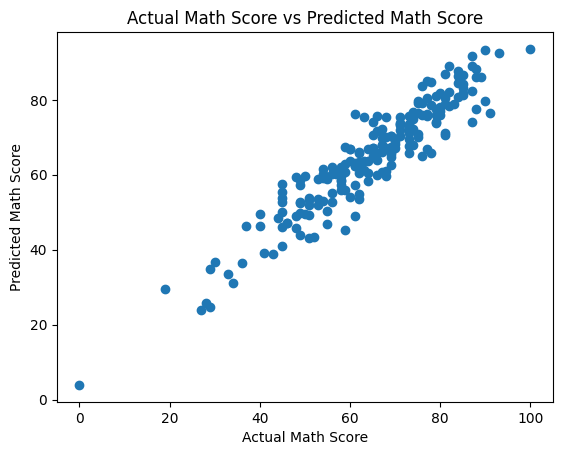

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual Math Score vs Predicted Math Score')
plt.show()

<Axes: xlabel='math_score'>

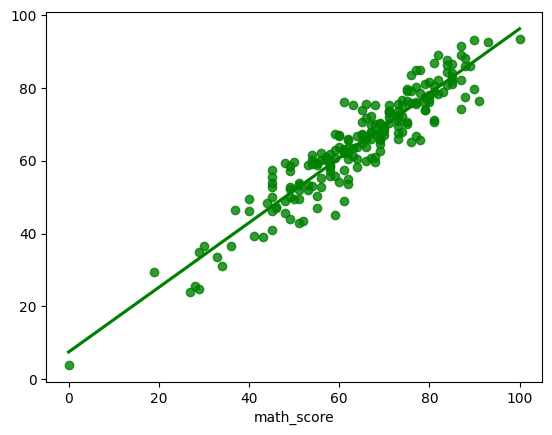

In [44]:
sns.regplot(x = y_test,y = y_pred, ci = None, color = 'green')

Difference between Actual and Predicted Values

In [45]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df.head()

,Actual,Predicted,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
